# Comp4331 Assignment 1

## Preparing the dataset

!echo ">> 1. remove old data if exists."
![ -e "student-por.csv" ] && rm "student-por.csv"
!echo ">> 2. download data from UCI."
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
!echo ">> 3. unzip the data."
!unzip student.zip
!echo ">> 4. remove unnecessary files."
!rm "student.zip" "student-mat.csv" "student-merge.R" "student.txt"
!echo ">> 5. finished!"

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn

In [3]:
data_file = "student-por.csv"

In [4]:
data_df = pd.read_csv(data_file, sep=';')

In [5]:
data_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


## Task 1. Basic summary
#### Report the mean, standard deviation, mode, median, and the five-number summary of the attributes age and G1.

In [21]:
#for age
age_stat = data_df['age'].describe() 
age_mode = data_df['age'].mode().iloc[0]
age_median = data_df['age'].median()
#for G1
G1_stat = data_df['G1'].describe()
G1_mode = data_df['G1'].mode().iloc[0]
G1_median = data_df['G1'].median()
#print function
print('Age Stat: ',age_stat)
print('Age Mode =',age_mode)
print('Age Median =',age_median,end='\n\n')

print('G1 Stat: ',G1_stat)
print('G1 Mode =',G1_mode)
print('G1 Median =',G1_median)


Age Stat:  count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Age Mode = 17
Age Median = 17.0

G1 Stat:  count    649.000000
mean      11.399076
std        2.745265
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64
G1 Mode = 10
G1 Median = 11.0


## Task 2. Box plot
#### For the attribute G2, use seaborn or matplotlib to show boxplots for
#### (a) G2;
#### (b) G2 for various values of sex (show sex in x-axis);
#### (c) G2 for various values of Dalc (show Dalc in x-axis).

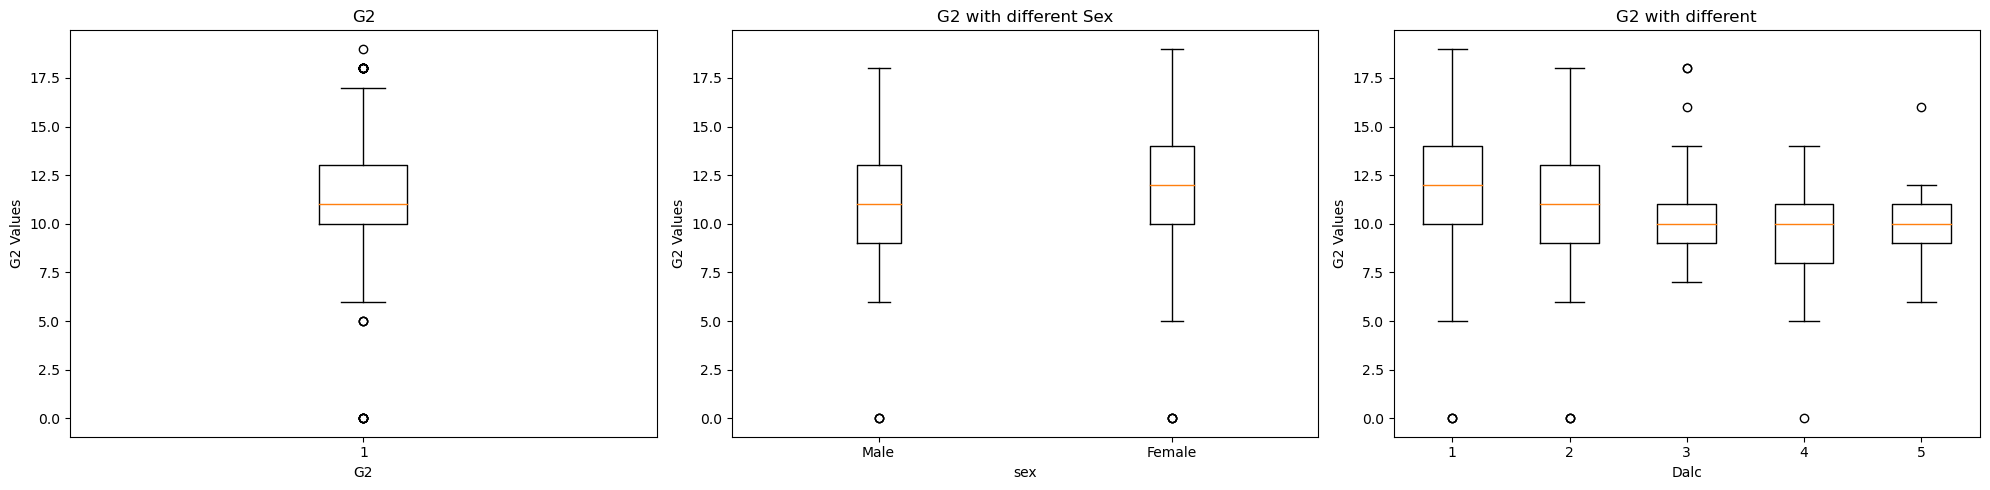

In [22]:
#Initialisation
fig = plt.figure(figsize=(20,5),dpi = 100)

#(a)
ax = plt.subplot(1,3,1)

ax.boxplot(data_df['G2'])
ax.title.set_text('G2')
ax.set_xlabel('G2')
ax.set_ylabel('G2 Values')


#(b)
ax = plt.subplot(1,3,2)

#data with different gender
male = data_df.loc[data_df['sex'] == 'M']
female = data_df.loc[data_df['sex'] == 'F']

ax.boxplot([male['G2'],female['G2']],labels = ['Male','Female'])
ax.title.set_text('G2 with different Sex')
ax.set_xlabel('sex')
ax.set_ylabel('G2 Values')


#(c)
ax = plt.subplot(1,3,3)
#count how many unique values of Dalcs in the data set
counts = len(data_df['Dalc'].unique())
dalc_df = data_df.sort_values('Dalc')

d = {}
for i in range(counts):
    d[i] = data_df.loc[data_df['Dalc'] == i+1]

ax.boxplot([d[0]['G2'],d[1]['G2'],d[2]['G2'],d[3]['G2'],d[4]['G2']],labels = [1,2,3,4,5])
ax.title.set_text('G2 with different')
ax.set_xlabel('Dalc')
ax.set_ylabel('G2 Values')
#are there any method to plot using for loop? for if i dont know how many distinct values in dalc, how can i plot the figure out?
#asked in stackoverflow, someone reply me can use for loop but not sure how to use, later do testing

#################################
#layout adjustment
plt.tight_layout()
plt.show()



## Task 3. Hist plot
#### For attributes age and absences, use seaborn or matplotlib to show their histograms (use 8 equal-sized bins).


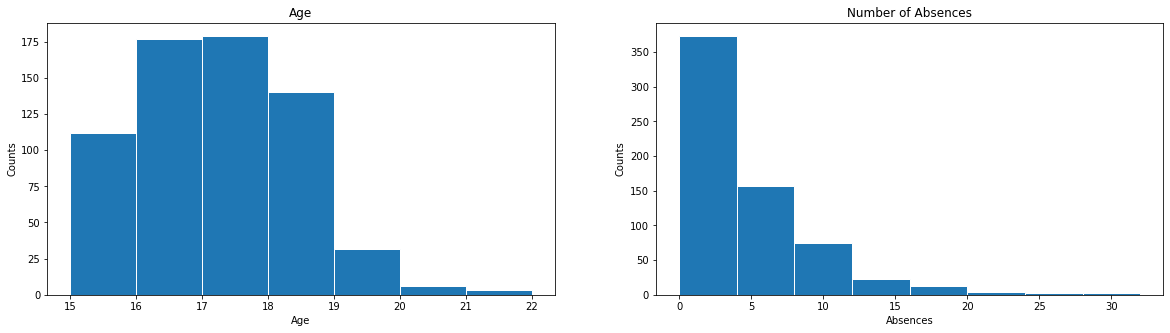

In [36]:
fig = plt.figure(figsize=(20,5))

##################################
ax = plt.subplot(1,2,1)

age_range = data_df['age'].max() - data_df['age'].min()
bin_size = int((age_range+1)/8)

ax.hist(data_df['age'],bins=range(min(data_df['age']),max(data_df['age'])+bin_size,bin_size),edgecolor = 'white')
ax.title.set_text('Age')
ax.set_xlabel('Age')
ax.set_ylabel('Counts')

#################################
ax = plt.subplot(1,2,2)

age_range = data_df['absences'].max() - data_df['absences'].min()
bin_size = int((age_range+1)/8)

ax.hist(data_df['absences'],bins=range(min(data_df['absences']),max(data_df['absences'])+bin_size,bin_size),edgecolor = 'white')
ax.title.set_text('Number of Absences')
ax.set_xlabel('Absences')
ax.set_ylabel('Counts')

#################################
fig.show()


## Task 4. Scatter plot
#### Use seaborn or matplotlib to show the scatter plot for attributes G2 and G3 (show G2 in x-axis). <br />
#### Report the correlation coeffcient between G2 and G3.

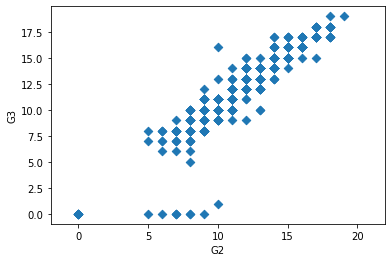

,G2,G3
G2,1.000000,0.918548
G3,0.918548,1.000000


In [24]:
#Initialisation
fig = plt.figure()
ax = plt.subplot()

#Scatter plot
ax.scatter(x=data_df['G2'],y=data_df['G3'],marker = 'D')
ax.set_xlim(-2,22)
ax.set_xlabel('G2')
ax.set_ylabel('G3')
plt.show()


#Correlation coefficicent
data_df[['G2','G3']].corr(method = 'pearson')


## Task 5. Correlation
#### Consider the 10 attributes {studytime, traveltime, age, absences, health, Walc, Dalc, famrel, goout,G2}, report the top 5 attributes that are most correlated (either positively or negatively) with G1.

In [25]:
corr_list = data_df[['G1','studytime','traveltime','age','absences','health','Walc','Dalc','famrel','goout','G2']].corr(method='pearson')
corr_col = corr_list['G1'].sort_values(ascending=False,key=abs)
print(corr_col.iloc[1:6])



G2           0.864982
studytime    0.260875
Dalc        -0.195171
age         -0.174322
Walc        -0.155649
Name: G1, dtype: float64


## Task 6. $\chi^2$-test
#### $\chi^2$ test (using the $\chi^2$ table shown on the last page). Show your steps clearly (including contingency table, $\chi^2$-value, and $p$-value) in the report. You can use the built-in function from scipy. <br/><br/> (a) By performing the $\chi^2$-test at a signicance level of 0.01, are the attributes internet and romantic independent of each other?<br/><br/> (b) By performing the $\chi^2$-test at a signicance level of 0.01, are the attributes sex and romantic independent of each other?


In [26]:
from scipy import stats
#(a)
C_Table_Int_and_Rom = pd.crosstab(data_df['internet'],data_df['romantic'])
print('Answer for question A\n\n',C_Table_Int_and_Rom , '\n')
chi2,p,dof,_ = stats.chi2_contingency(C_Table_Int_and_Rom)
print('chi^2: {}, p: {}, dof: {}'.format(chi2,p,dof),'\n')
print('As the dof is 1, according to the Chi^2 table in the last page of the assignmnet \n(0.6257 < 6.64) \n It nonsignificant to reject the hypothesis as the probability they are independent is not rare. Therefore we should\'t reject the claim that \'Attributes internet and romantic are independent of each other\' ')

#(b)
C_Table_Sex_and_Rom = pd.crosstab(data_df['sex'],data_df['romantic'])
print('Answer for question B\n\n',C_Table_Sex_and_Rom , '\n')
chi2,p,dof,_ = stats.chi2_contingency(C_Table_Sex_and_Rom)
print('chi^2: {}, p: {}, dof: {}'.format(chi2,p,dof),'\n')
print('As the dof is 1, according to the Chi^2 table in the last page of the assignmnet \n(7.42 > 6.64) \n It\'s significant enough to say the two attributes are not independent. Therefore we should reject the claim that \'Attributes sex and romantic are independent of each other\'')



Answer for question A

 romantic   no  yes
internet          
no        100   51
yes       310  188 

chi^2: 0.6257689682908932, p: 0.42891154482619887, dof: 1 

As the dof is 1, according to the Chi^2 table in the last page of the assignmnet 
(0.6257 < 6.64) 
 It nonsignificant to reject the hypothesis as the probability they are independent is not rare. Therefore we should't reject the claim that 'Attributes internet and romantic are independent of each other' 
Answer for question B

 romantic   no  yes
sex               
F         225  158
M         185   81 

chi^2: 7.415931288436628, p: 0.0064648842822434185, dof: 1 

As the dof is 1, according to the Chi^2 table in the last page of the assignmnet 
(7.42 > 6.64) 
 It's significant enough to say the two attributes are not independent. Therefore we should reject the claim that 'Attributes sex and romantic are independent of each other'


## Task 7. Normalization
#### (a) Normalize attribute studytime to the range $[0,1]$ using min-max normalization. You can use the built-in function from scikit-learn.<br/><br/> (b) Normalize attributes {G1, G2, G3, Dalc, Walc} to mean zero and standard deviation one using z-score normalization. You can use built-in function from scikit-learn.<br/><br/> (c) Output your results in parts (a) and (b) above to the csv   data normalized.csv (use "," as field delimiter and include column names in the header).

In [27]:
#(a)
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler(feature_range = (0,1))
normalized_df1 = pd.DataFrame(scaler1.fit_transform(data_df[['studytime']]),columns=['studytime_scaled'])
print(normalized_df1.head(10))

#(b)
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()

normalized_df2 = pd.DataFrame(scaler2.fit_transform(data_df[['G1','G2','G3','Dalc','Walc']]),columns=['G1_scaled','G2_scaled','G3_scaled','Dalc_scaled','Walc_scaled'])
print(normalized_df2.head(10))

#(c)
normalized_df = pd.merge(normalized_df1,normalized_df2,left_index=True,right_index = True)
normalized_df.to_csv('data_normalized.csv',index=True,sep=',')



   studytime_scaled
0          0.333333
1          0.333333
2          0.333333
3          0.666667
4          0.333333
5          0.333333
6          0.333333
7          0.333333
8          0.333333
9          0.333333
   G1_scaled  G2_scaled  G3_scaled  Dalc_scaled  Walc_scaled
0  -4.155470  -0.195820  -0.280658    -0.543555    -0.997695
1  -0.874570  -0.195820  -0.280658    -0.543555    -0.997695
2   0.219064   0.491137   0.029116     0.538553     0.560678
3   0.948153   0.834615   0.648663    -0.543555    -0.997695
4  -0.145481   0.491137   0.338889    -0.543555    -0.218508
5   0.219064   0.147659   0.338889    -0.543555    -0.218508
6   0.583608   0.147659   0.338889    -0.543555    -0.997695
7  -0.510025   0.491137   0.338889    -0.543555    -0.997695
8   1.312697   1.521571   1.577983    -0.543555    -0.997695
9   0.219064   0.147659   0.338889    -0.543555    -0.997695


## Task 8. PCA
#### In this question, use only the attributes {G1, G2, G3, Dal, Walc} after the normalization in Task 7b.<br/><br/> (a) Plot the cumulative explained variance with the number of principal components.<br/><br/> (b) Transform the data by PCA, by using the smallest number of PCA components such that the proportion of explained variance is at least 0.9.<br/><br/> (c) For the transformed data, output the transformed dimensions to the csv "data reduced.csv" without the header (use "," as field delimiter), and report the five-number summary for each obtained dimension. You can use the built-in function from scikit-learn.

explain_ratio: [0.58 0.87 0.95 0.98]
                  0             1             2
count  6.490000e+02  6.490000e+02  6.490000e+02
mean   9.408670e-17 -3.626615e-17  1.394194e-17
std    1.702773e+00  1.210444e+00  6.194442e-01
min   -4.255613e+00 -2.927694e+00 -1.908536e+00
25%   -1.122190e+00 -8.887867e-01 -2.595552e-01
50%   -1.274497e-02 -2.378362e-01  2.135860e-01
75%    1.171323e+00  7.260033e-01  3.311916e-01
max    6.200937e+00  4.777154e+00  3.374054e+00


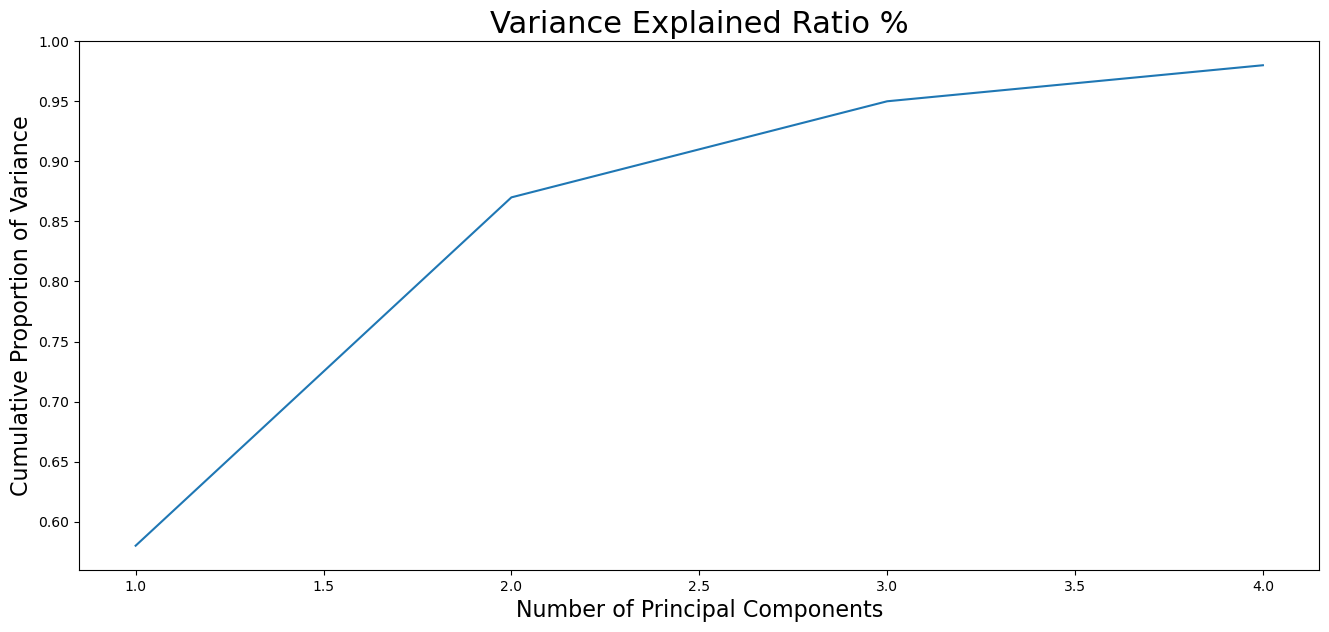

In [28]:
from sklearn.decomposition import PCA

#(a)
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(normalized_df2)
eigenvalue = pca.explained_variance_

explain_ratio = pca.explained_variance_ratio_.cumsum().round(2)
print('explain_ratio:', explain_ratio)

fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.title('Variance Explained Ratio %', fontsize=22)
plt.xlabel('Number of Principal Components', fontsize=16)
plt.ylabel('Cumulative Proportion of Variance', fontsize=16)
plt.plot(range(1, 5), explain_ratio)


#(b)
pca = PCA(n_components=3)
principalComponents3 = pca.fit_transform(normalized_df2)

#(c)
#(c) export to csv file
principalComponents3_df = pd.DataFrame(principalComponents3)
principalComponents3_df.to_csv('data_reduced.csv',sep=',')

#(c)five number summary
print(principalComponents3_df.describe())


## Task 9. Missing values
#### Consider the original data. At first glance, this dataset has no missing value. However, for G2 and G3, some students got zero scores. We assume that this is because they missed the exams, and these zero scores can be viewed as missing values. Please fill in the missing values with the corresponding attribute mode, and show the scatter plot for attributes G2 and G3 again (show G2 in x-axis). You can use the "DataFrame.replace" function from pandas. After filling in the missing values, report the correlation coecient between G2 and G3 again, and compare it with the value obtained in Task 4.

reloading the dataset

In [29]:
data_df = pd.read_csv(data_file, sep=';')

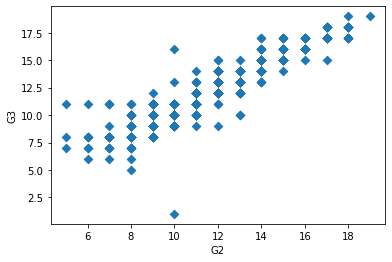

,G2_replace,G3_replace
G2_replace,1.000000,0.923444
G3_replace,0.923444,1.000000


In [30]:
#replace 0 with mode
data_df['G2_replace'] = data_df['G2'].replace(to_replace=0,value=data_df['G2'].mode().iloc[0])
data_df['G3_replace'] = data_df['G3'].replace(to_replace=0,value=data_df['G3'].mode().iloc[0])

fig = plt.figure()
ax = plt.subplot()

ax.scatter(data_df['G2_replace'],data_df['G3_replace'],marker='D')
ax.set_xlabel('G2')
ax.set_ylabel('G3')
plt.show()


data_df[['G2_replace','G3_replace']].corr(method='pearson')
# the compare of data are shown in report.pdf